In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor







In [2]:
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-11-03 10:18:41,213: Credentials already present. Set overwrite=True to overwrite.


In [3]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
api = 'e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d'

In [5]:
import numpy as np


def Pauli(j):
    if j == 0:
        return np.array([[1, 0], [0, 1]])
    elif j == 1:
        return np.array([[0, 1], [1, 0]])
    elif j == 2:
        return np.array([[0, -1j], [1j, 0]])
    elif j == 3:
        return np.array([[1, 0], [0, -1]])




In [6]:
def trace(A):
    tr = 0
    for i in range(len(A)):
        tr+= A[i][i] 
    return(tr)



In [7]:
def normTr(d, A):
    ev = np.linalg.eigvalsh(A)
    Ntr = 0
    for j in range(0, d):
        Ntr += abs(ev[j]) #calculate the sum of all absolute values 
    return Ntr

In [8]:
def negativity(d, rhoTp):
    En = 0.5*(normTr(d, rhoTp) - 1.0)
    return En





In [9]:
#maximizing a  bell state:
#This cell makes measurements in x,y,and z bases 


#variation_A_Hadamard_and_CNOT

#n is number of qubits
n = 2
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = []

for i in range(3**n):
    qc.append(QuantumCircuit(q, c))
    qc[i].h(0)
    qc[i].cx(0,1)
    
    


count = 0 #count refers to the total number of circuits.
for i in range(3):
    for j in range(3):
        if i == 0: 
            qc[count].h(0)
        elif i == 1:
            qc[count].s(0).inverse()
            qc[count].h(0)
        if j == 0:
            qc[count].h(1)
        elif j == 1:
            qc[count].s(1).inverse()
            qc[count].h(1)
        count += 1
        
for i in range(3**n):
    qc[i].measure(q,c)

  



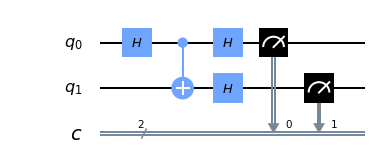

In [10]:
qc[0].draw(output = 'mpl')

In [11]:
qc

In [12]:
path = '/Users/student/Documents/summer_research/circuit_results/project1_files/ET_var_B/'

In [13]:
backend = provider.get_backend('ibmq_valencia')
output = []
n = 5 # total number of circuits for each number of identity gates. 
for i in range(n):
    job_exp = qiskit.execute(qc,backend=backend,shots = 8132)
    print(i)
    job_monitor(job_exp)
    output = job_exp.result().get_counts()
    df = pd.DataFrame(output)
    df.to_csv(path  + "var_B_H&C" + str(i)+ ".csv") ##variation_A_Hadamard_and_CNOT


    










0
Job Status: job has successfully run                        
1
Job Status: job has successfully run                  
2
Job Status: job has successfully run                     
3
Job Status: job has successfully run                          
4
Job Status: job has successfully run


#Automation planning:
1) Place id_gates in 5 positions of the circuit
2) write a code that does this in a single run. 


In [37]:
#sorts the output based on tuples

def sort_output(data):
    sorted_output = []
    for i in range(len(data)):
        sorted_output.append(sorted(data[i].items()))
    return(sorted_output)




In [38]:
#takes the probabilities from the sorted_output and gives an array in sorted order.
def probability(sorted_output):
    ns = 8132
    values = []
    for i in range(len(sorted_output)):
        for j in range(4):
            values.append(sorted_output[i][j][1]/ns)
    p = np.array(values)
    p
    return(p)
    

In [39]:
#density operator reconstruction begins here. 
#Outputs probability coefficient using probability from IBM Q as input

def prob_coeff(p):
    d1 = np.eye(4)
    ab = [1, -1]
    A = []
    for i in range(1,4):
        for j in range(1,4):
            for a in ab :
                for b in ab :
                    B = []
                    for al in range(4):
                        for be in range(4):
                            mat = (d1[al][0] + a* d1[al][i]) * (d1[be][0] + b* d1[be][j])/4
                            #mat = (int(d0[al]) + a* int(d1[i][al])) * (int(d0[be]) + b*int(d1[j][be]))/4 
                            B.append(mat)
                    A.append(B) #We append our matrix here because we need 16 different elements of c_s so that we don't need to reshape
    M = np.array(A, dtype = float)
    M_inv = np.linalg.pinv(M)
    C = np.matmul(M_inv, p)
    return(C)


#This is the rho equation which takes the prob coefficients (C) as its input
def rho_eq(C):
    B = []
    d = 0
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
    
    
    return(B)

rho = np.zeros((4,4))
for i in range(len(B)):
    rho = rho + B[i]
rho

#We combine these two parts to create the function below. 




In [40]:
#This is the rho equation which takes the prob coefficients (C) as its input and returns the reconstructed density operator
def rho_eq(C):
    B = []
    d = 0
    rho = np.zeros((4,4))
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
        
    for i in range(len(B)):
        rho = rho + B[i]
    return(rho)







In [41]:
#takes the reconstructed density operator as its input and changes the list with negative eigenvalues to positive.
def pos_eigval_creater(den_op):
    a = 0
    eigval = np.linalg.eigvalsh(den_op)
    meu = sorted(eigval, reverse = True)
    lmd = np.zeros(len(meu))
    count = 0
    for i in reversed(range(len(meu))) :
        if (meu[i].real + a/(i+1)) < 0:
            lmd[i] = 0
            a += lmd[i] + meu[i]
            lmd[i-1] = meu[i-1].real + a
            count = count + 1

        else:
            lmd[i] = meu[i].real + a/(count+1)
    return(lmd)
        

In [42]:
#This function takes our reconstructed density operator and updates it with new eigenvalues 
def rho_updated_meu(den_op,lmd): #lmd is the new eigenvalue which is the output of  pos_eigval_creater(rho)
    n = 2
    matrix = np.zeros((2**n,2**n))
    eigval, eigvecs = np.linalg.eig(den_op)
    for i in range(len(lmd)):
        matrix = matrix + lmd[i]* np.outer(eigvecs[i] , eigvecs[i])
    return(matrix)



In [43]:
def matrix_to_list(rho):
    rho_list = []
    for i in range(len(rho)):
        for j in range(len(rho[0])):
            rho_list.append(rho[i][j])
    return(rho_list)



In [44]:
def partial_transpose(rho_lst, q):#This function computes the partial transpose of a matrix. 
    z = np.array([1,0])
    o = np.array([0,1])
    lst = [z,o]
    M = np.zeros((4,4))
    dd = 0
    for i in lst:
        for j in lst:
            for i1 in lst:
                for j1 in lst:
                    if q == 0:
                        M = M + rho_lst[dd] * np.kron(np.outer(i1,i),np.outer(j,j1))
                    elif q == 1:
                        M = M + rho_lst[dd] * np.kron(np.outer(i,i1),np.outer(j1,j))
                    dd = dd + 1
    return(M)               
                

In [45]:
#How do I incorporate new eigenvalues to the density operator 

In [46]:
def csv_to_dict(filename, PATH):  
    outcome = []
    output = []
    import csv
    with open(PATH + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            row = row[1:5]
            outcome.append(row)

    for i in range(1,len(outcome)):
        for j in range(len(outcome[0])):
            if outcome[i][j] == '':
                outcome[i][j] = 0
            else:    
                outcome[i][j] = int(float(outcome[i][j]))
        output.append(dict(zip(outcome[0], outcome[i])))
    return output       
        

In [47]:
path1 =  '/Users/student/Documents/summer_research/circuit_results/project1_files/ET_var_B/' 

In [48]:
x = []
for i in range(5):
    raw_data = csv_to_dict("var_B_H&C" + str(i)+ ".csv", path)
    x.append(raw_data)
    
x

[[{'01': 409, '00': 3921, '10': 169, '11': 3633},
  {'01': 2238, '00': 2268, '10': 1825, '11': 1801},
  {'01': 2300, '00': 2107, '10': 1901, '11': 1824},
  {'01': 2087, '00': 2135, '10': 2034, '11': 1876},
  {'01': 3904, '00': 532, '10': 3599, '11': 97},
  {'01': 2194, '00': 2200, '10': 1941, '11': 1797},
  {'01': 2060, '00': 2241, '10': 1902, '11': 1929},
  {'01': 2263, '00': 2178, '10': 1953, '11': 1738},
  {'01': 411, '00': 3985, '10': 164, '11': 3572}],
 [{'01': 441, '00': 3913, '10': 132, '11': 3646},
  {'01': 2207, '00': 2246, '10': 1842, '11': 1837},
  {'01': 2200, '00': 2163, '10': 1839, '11': 1930},
  {'01': 2175, '00': 2193, '10': 1977, '11': 1787},
  {'01': 3919, '00': 503, '10': 3637, '11': 73},
  {'01': 2214, '00': 2173, '10': 1941, '11': 1804},
  {'01': 2117, '00': 2244, '10': 1905, '11': 1866},
  {'01': 2283, '00': 2237, '10': 1919, '11': 1693},
  {'01': 430, '00': 4047, '10': 132, '11': 3523}],
 [{'01': 437, '00': 3876, '10': 162, '11': 3657},
  {'01': 2212, '00': 2199,

In [49]:
#define your path1 and q.
def ET_for_all(path):
    ET_list = []
    for i in range(0,5):
        q = 1
        raw_data = csv_to_dict("var_B_H&C" + str(i)+ ".csv", path)

        p = probability(sort_output(raw_data))

        Coeff = prob_coeff(p)

        den_op = rho_eq(Coeff)

        lmd = pos_eigval_creater(den_op)
        rho_with_meu = rho_updated_meu(den_op,lmd)

        rho_lst = matrix_to_list(rho_with_meu)

        rhoTp = partial_transpose(rho_lst, q)

        ET_list.append(negativity(4, rhoTp))

    return ET_list




In [53]:
out = ET_for_all(path1)
out

[0.22717115878989247,
 0.25382164553596476,
 0.21398170881493117,
 0.15238483747648124,
 0.20413509099098803]

In [54]:
min(out),max(out),np.mean(out)

(0.15238483747648124, 0.25382164553596476, 0.21029888832165153)

In [51]:
df = pd.DataFrame(ET_for_all(path1))
df.to_csv(path1 +  "ET_var_A.csv")

In [56]:
raw_data1 = csv_to_dict("var_B_H&C" + str(0)+ ".csv", path1)
raw_data1



[{'01': 409, '00': 3921, '10': 169, '11': 3633},
 {'01': 2238, '00': 2268, '10': 1825, '11': 1801},
 {'01': 2300, '00': 2107, '10': 1901, '11': 1824},
 {'01': 2087, '00': 2135, '10': 2034, '11': 1876},
 {'01': 3904, '00': 532, '10': 3599, '11': 97},
 {'01': 2194, '00': 2200, '10': 1941, '11': 1797},
 {'01': 2060, '00': 2241, '10': 1902, '11': 1929},
 {'01': 2263, '00': 2178, '10': 1953, '11': 1738},
 {'01': 411, '00': 3985, '10': 164, '11': 3572}]

In [35]:
raw_data1 = csv_to_dict("var_B_H&C" + str(2)+ ".csv", path1)
raw_data1




[{'01': 437, '00': 3876, '10': 162, '11': 3657},
 {'01': 2212, '00': 2199, '10': 1888, '11': 1833},
 {'01': 2247, '00': 2148, '10': 1872, '11': 1865},
 {'01': 2128, '00': 2181, '10': 1964, '11': 1859},
 {'01': 3858, '00': 566, '10': 3640, '11': 68},
 {'01': 2206, '00': 2199, '10': 1992, '11': 1735},
 {'01': 2095, '00': 2183, '10': 1897, '11': 1957},
 {'01': 2185, '00': 2184, '10': 2018, '11': 1745},
 {'01': 437, '00': 4046, '10': 150, '11': 3499}]

In [60]:
den_op1

array([[ 0.48596081+0.j        ,  0.0105755 +0.00600508j,
         0.0131169 -0.01326037j,  0.42578701+0.00319725j],
       [ 0.0105755 -0.00600508j,  0.05257009+0.j        ,
         0.00313576+0.00356616j,  0.02971799-0.02174537j],
       [ 0.0131169 +0.01326037j,  0.00313576-0.00356616j,
         0.01813822+0.j        , -0.00221348-0.01244056j],
       [ 0.42578701-0.00319725j,  0.02971799+0.02174537j,
        -0.00221348+0.01244056j,  0.44333087+0.j        ]])

In [65]:
eigval = np.linalg.eigvalsh(den_op1)
eigval

array([0.00377199, 0.03425628, 0.06953239, 0.89243934])

In [61]:
lmd1

array([0.89243934, 0.06953239, 0.03425628, 0.00377199])

In [59]:
probability(sort_output(raw_data1))
Coeff1 = prob_coeff(probability(sort_output(raw_data1)))
den_op1 = rho_eq(Coeff1)
lmd1= pos_eigval_creater(den_op1)
rho_with_meu1 = rho_updated_meu(den_op1,lmd1)

rho_with_meu1








array([[ 0.46889395-1.31941758e-04j, -0.21600906-1.96155853e-01j,
        -0.13944726+2.10856749e-01j,  0.15021653+1.59271929e-01j],
       [-0.21600906-1.96155853e-01j,  0.05223701+1.81907871e-01j,
         0.1563355 -4.09464075e-02j,  0.03631821-1.36283368e-01j],
       [-0.13944726+2.10856749e-01j,  0.1563355 -4.09464075e-02j,
        -0.03311116-1.28218317e-01j, -0.12139419+4.04343169e-02j],
       [ 0.15021653+1.59271929e-01j,  0.03631821-1.36283368e-01j,
        -0.12139419+4.04343169e-02j,  0.01691404+1.01261382e-01j]])

In [ ]:
1/2[(1,0,0,1,),(0,0,0,)]